In [30]:
import glob
import random
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim import corpora, models
from tqdm import tqdm
import numpy as np

stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in simple_preprocess(text, min_len = 4):
        if token not in STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

cat_list = glob.glob ("cuisines/*")
cat_size = len(cat_list)

random.seed(0)
cat_names = []
cat_text = []
# sample_size = min(30, cat_size)
# cat_sample = sorted(random.sample(range(cat_size), sample_size))
cat_sample = range(0, cat_size)

count = 0
for i in cat_sample:
    cat_names.append(cat_list[i].replace("\\", "/").split('/')[-1][:-4].replace("_"," "))
    with open(cat_list[i]) as f:
        cat_text.append(f.read().replace("\n", "").replace("\r",""))

processed_docs = [preprocess(text) for text in tqdm(cat_text)]
dictionary = corpora.Dictionary(processed_docs)
print("Before prunn:%d"%(len(dictionary)))
dictionary.filter_extremes(no_above=0.5)
print("After prunn:%d"%(len(dictionary)))
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

100%|██████████| 146/146 [35:13<00:00, 14.47s/it] 


Before prunn:192926
After prunn:42524


In [31]:
import math

def cosine_similarity(a, b):
    b = dict(b)
    norm_a = 0
    norm_b = 0
    denom = 0
    for a_i, a_v in a:
        norm_a += a_v * a_v
        if a_i in b:
            denom += a_v * b[a_i]
    for b_i in b:
        norm_b += b[b_i] * b[b_i]
    
    norm_a = math.sqrt(norm_a)
    norm_b = math.sqrt(norm_b)
#     print(norm_a)
#     print(norm_b)
#     print(denom)
    
    return denom / (norm_a * norm_b)

def top_n(n, ):
    

In [32]:
import numpy as np
import pandas as pd

sim = np.zeros([len(corpus), len(corpus)])

for i in tqdm(range(0, len(corpus) - 1)):
    for j in range(i + 1, len(corpus)):
        sim[i][j] = cosine_similarity(corpus[i], corpus[j])
        sim[j][i] = sim[i][j]

sim_df = pd.DataFrame(sim)
sim_df.index = cat_names
sim_df.columns = cat_names

100%|██████████| 145/145 [00:21<00:00,  6.79it/s]


In [44]:
sig_df = sim_df
sig_df[sig_df < 0.1] = 0

1

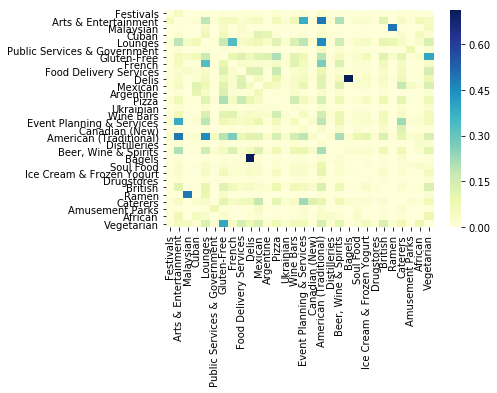

In [22]:

import seaborn as sns; 
import matplotlib.pyplot as plt

# data = pd.read_csv("cuisine_sim_matrix.csv", header=None)
# data.index = cat_names
# data.columns = cat_names
ax = sns.heatmap(sim_df,cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.show()

In [20]:
sim_df[6:7]

,Festivals,Arts & Entertainment,Malaysian,Cuban,Lounges,Public Services & Government,Gluten-Free,French,Food Delivery Services,Delis,...,Bagels,Soul Food,Ice Cream & Frozen Yogurt,Drugstores,British,Ramen,Caterers,Amusement Parks,African,Vegetarian
Gluten-Free,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098165,0.126913,0.068446,...,0.012284,0.032023,0.067373,0.006413,0.116758,0.035916,0.108718,0.012237,0.02812,0.391378
